# ISYE 6740 - DENSITY ESTIMATION


### Section 2. Density estimation: Psychological experiments

We will use this data to study whether or not the two brain regions are likely to be indepen-
dent of each other and considering different types of political view For this question; you
can use the proper package for histogram and KDE; no need to write your own.
The data set n90pol.csv contains information on 90 university students who participated in
a psychological experiment designed to look for relationships between the size of different
regions of the brain and political views. The variables amygdala and acc indicate the volume
of two particular brain regions known to be involved in emotions and decision-making, the
amygdala and the anterior cingulate cortex; more exactly, these are residuals from the pre-
dicted volume, after adjusting for height, sex, and similar body-type variables. The variable
orientation gives the students' locations on a ve-point scale from 1 (very conservative) to 5
(very liberal). Note that in the dataset, we only have observations for orientation from 2 to
5.

Recall in this case, the kernel density estimator (KDE) for a density is given by

 $$p(x) = \frac 1 m \sum_{i=1}^m \frac 1 h
 K\left(
 \frac{x^i - x}{h}
 \right)$$

where $x^i$ are two-dimensional vectors, $h >0$ is the kernel bandwidth, based on the criterion
we discussed in lecture. For one-dimensional KDE, use a one-dimensional Gaussian kernel

$$K(x) = \frac{1}{\sqrt {2\pi}} e^{-\frac{x^2}{2}}$$

For two-dimensional KDE, use a two-dimensional Gaussian kernel: for

$$x = \begin{bmatrix}x_1\\x_2\end{bmatrix}\in \mathbb R^2$$

where $x_1$ and $x_2$ are the two dimensions respectively 

$$K(x) = \frac{1}{\{2\pi}e^{-\frac{(x_1)^2 + (x_2)^2)}{2}}$$


In [38]:
#Import all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import seaborn as sns
from sklearn.neighbors import KernelDensity
import math

In [39]:
df = pd.read_csv("data/n90pol.csv")

In [40]:
df.head()

,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3
3,0.0504,-0.0167,2
4,0.0125,-0.0005,5


#### Question (a). Form the 1-dimensional histogram and KDE to estimate the distributions of amygdala and acc, respectively. For this question, you can ignore the variable orientation.

In [41]:
#Print 1-D histogram and KDE
def print_histogramKDE(data,col_name, num_bins = 10):
    '''
    data -> dataframe
    col_name -> str, the column name in the data
    num_bins -> int, the number of bins
    '''
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.rc('font', size=15)
    plt.rc('axes', titlesize=15)
    plt.rc('axes', labelsize=15) 
    plt.rc('xtick', labelsize=15)
    
    plt.title("Distribution of {}".format(col_name))
    plt.xlabel('volume')
    plt.ylabel('counts')

    plt.hist(data[col_name], edgecolor='black', bins= num_bins)
    
    g = sns.kdeplot(data = data[col_name])
    ax.legend(['Density for {} distribution'.format(col_name)])
    
    plt.show()
    
    

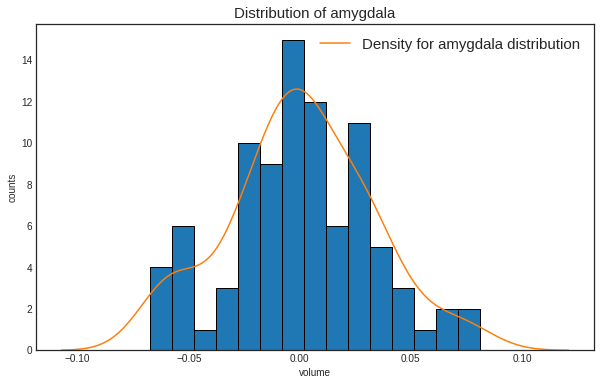

In [42]:
print_histogramKDE(df,'amygdala',num_bins =15)

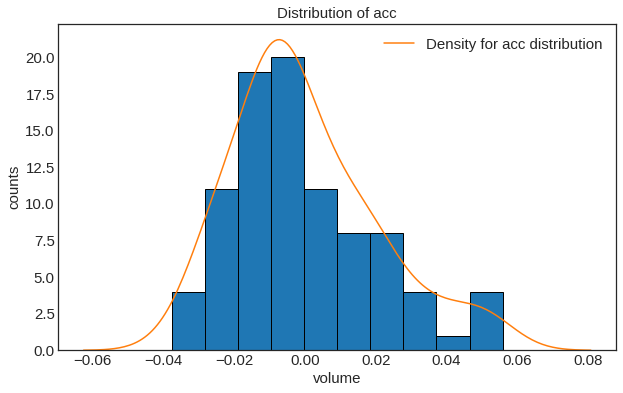

In [43]:
print_histogramKDE(df,'acc',num_bins =10)

#### Question (b). Form 2-dimensional histogram for the pairs of variables (amygdala, acc). Decide on a suitable number of bins so you can see the shape of the distribution clearly.

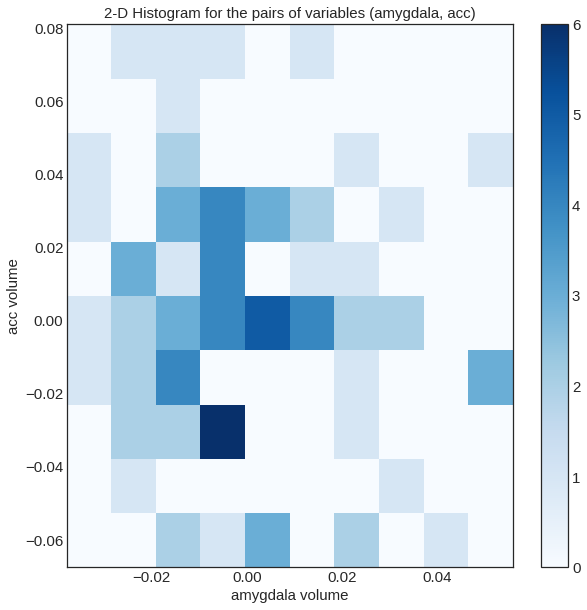

In [44]:
plt.figure(figsize=(10, 10))
plt.hist2d(df['acc'].values, df["amygdala"].values, bins=(10, 10), cmap=plt.cm.Blues)
plt.xlabel("amygdala volume")
plt.ylabel("acc volume")
plt.title("2-D Histogram for the pairs of variables (amygdala, acc)")
plt.colorbar()
plt.show()

#### Note: The distribution for the pairs of variables is presented in a sequential color scale . If the block is colored in a darker blue, it indicates the higher density for the two variables.

#### Question (c). Use kernel-density-estimation (KDE) to estimate the 2-dimensional density function of (amygdala, acc) (this means for this question, you can ignore the variable orientation). Set an appropriate kernel bandwidth h > 0.


In [45]:
#Calculate the appropriate kernel bandwidth
def cal_bandwidth(data,col_name):
    '''
    data -> dataframe
    col_name -> str, the column name in the data
    return -> float64
    '''
    n = len(data)
    sigma = np.std(data[col_name])
    h = 1.06*sigma*n**(-1/5)
    
    return h

In [46]:
h_amy =cal_bandwidth(df,'amygdala')
h_acc = cal_bandwidth(df,'acc')

#### The KDE calculation refers to https://machinelearningmastery.com/probability-density-estimation/

In [47]:
#Create a function to calculate KDE in 2 dimension
def KDE_2d(x,y,num_grid=10,bandwidth=h_amy):
    '''
    x -> numpy.ndarray
    y -> numpy.ndarray
    num_grid -> int, number of grid points in each direction
    bandwidth -> int, the bandwidth of the indiviual distributions
    rtype -> x_grid: numpy.ndarray, the x-dimension of the x grid for plotting
             y_grid: numpy.ndarray,  the y-dimension of the y grid for plotting
             z: numpy.ndarray, the kde result
    '''
    #determine the grid
    x_step = (max(x) - min(x))/num_grid
    y_step = (max(y) - min(y))/num_grid
    
    #set up the axis
    x_axis = np.arange(min(x)-2*x_step, max(x)+2*x_step, x_step)
    y_axis = np.arange(min(y)-2*y_step, max(y)+2*y_step, x_step)
    
    x_grid, y_grid = np.meshgrid(x_axis,y_axis)
    
    #set up the training and sampling data
    sample = np.vstack([y_grid.ravel(),x_grid.ravel()]).T    
    train = np.vstack([y,x]).T
    
    #train the model
    model = KernelDensity(bandwidth=bandwidth, kernel = 'gaussian')
    model.fit(train)
    
    #invert the log operation by calculating the exponent or exp() to return the values to the range 0-1 for normal probabilities
    probabilities = model.score_samples(sample)
    probabilities = np.exp(probabilities)
    
    z = np.reshape(probabilities,x_grid.shape)
    
    return x_grid, y_grid, z

In [48]:
#set up the data, run the model
x = df["amygdala"].values
y = df['acc'].values

xxx,yyy, z = KDE_2d(x,y)

#### Please show the two-dimensional KDE (e.g., two-dimensional heat-map, two-dimensional contour plot, etc.)


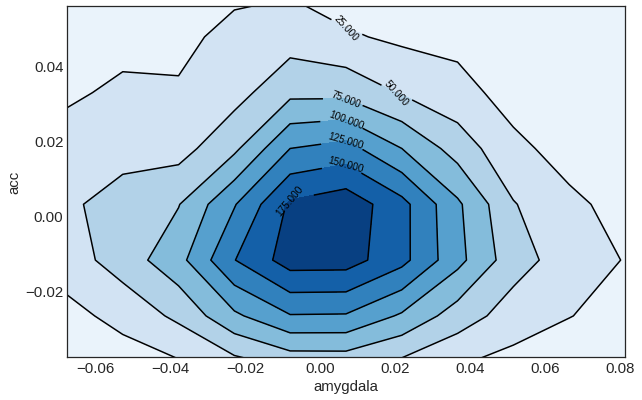

In [49]:
# plot the contour
fig = plt.figure(figsize=(10, 15))
ax = fig.gca()
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
cfset = ax.contourf(xxx, yyy, z, cmap='Blues')
ax.imshow(np.rot90(z), cmap='Blues', extent=[min(x), max(x), min(y), max(y)])
cset = ax.contour(xxx, yyy, z, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('amygdala')
ax.set_ylabel('acc')
plt.show()

#### Please explain based on the results, can you infer that the two variables (amygdala, acc) are likely to be independent or not?

#### Answer: The two variables are likely not independent with each other. Both variables have high density when the volumes toward to 0.

#### Question (d) Consider the variable orientation and consider conditional distributions. Please plot the estimated conditional distribution of amygdala conditioning on political orientation using KDE. Set an appropriate kernel bandwidth h > 0. Do the same for the volume of the acc using KDE.

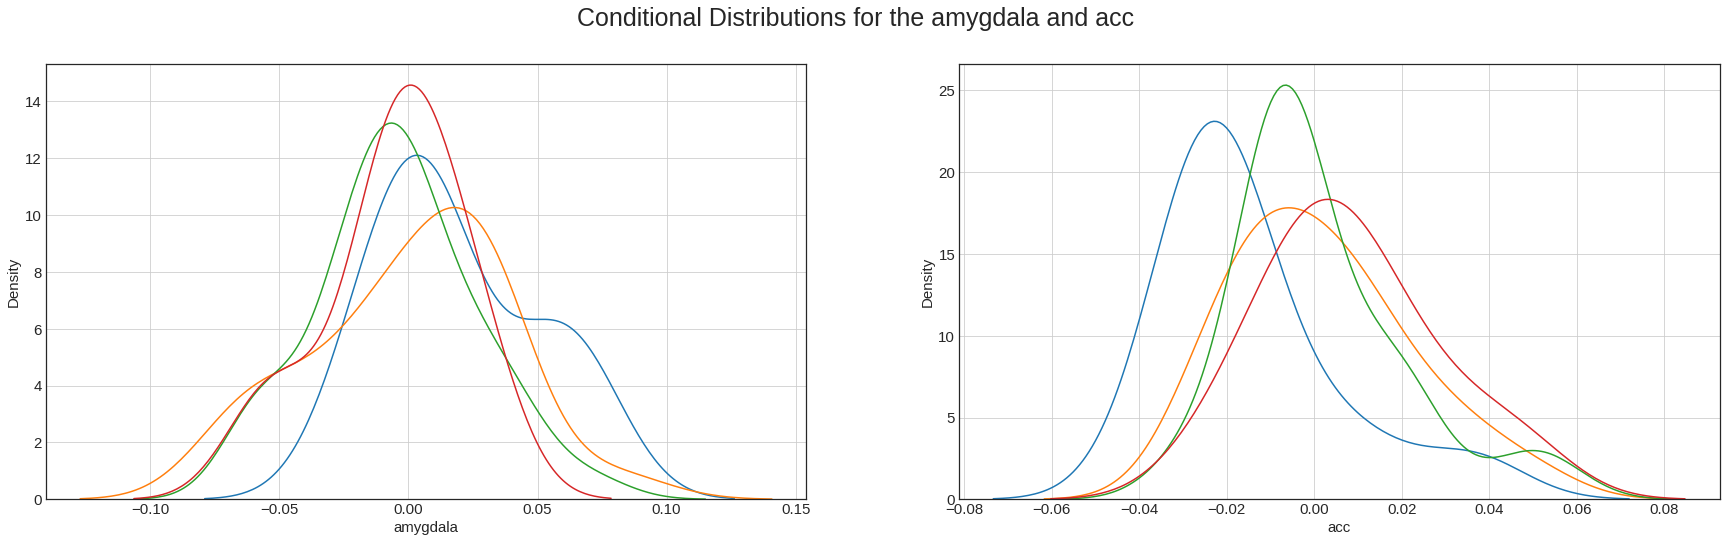

In [50]:
fig, axes = plt.subplots(1,2,figsize=(30,8))
fig.suptitle("Conditional Distributions for the amygdala and acc", fontsize=25)

# plot the conditional distribution for amygdala
for i in range(2,6):
    sns.kdeplot(df[df['orientation']==i].iloc[:,0], ax=axes[0], label = 'Orientation {}'.format(str(i)))
    axes[0].grid(b=True,which='both')

# plot the conditional distribution for acc
for i in range(2,6):
    sns.kdeplot(df[df['orientation']==i].iloc[:,1], ax=axes[1], label = 'Orientation {}'.format(str(i)))
    axes[1].grid(b=True,which='both')    

#### Based on the graphs shown in above, I infer that the conditional distribution of amygdala and acc, respectively, are pretty identical with each other from differernt orientation since they all have a bell-shape distribution.

#### The conditional sample mean for the two variables are shown in the following:

In [51]:
for i in range(2,6):
    amy_mean = np.mean(df[df['orientation']==i].iloc[:,0])
    print('the sample mean for amygdala in Orientation {} is: '.format(str(i)), amy_mean)
    
for i in range(2,6):
    acc_mean = np.mean(df[df['orientation']==i].iloc[:,1])
    print('the sample mean for acc in Orientation {} is: '.format(str(i)), acc_mean)

the sample mean for amygdala in Orientation 2 is:  0.01906153846153846
the sample mean for amygdala in Orientation 3 is:  0.0005875
the sample mean for amygdala in Orientation 4 is:  -0.004719512195121951
the sample mean for amygdala in Orientation 5 is:  -0.005691666666666665
the sample mean for acc in Orientation 2 is:  -0.014769230769230769
the sample mean for acc in Orientation 3 is:  0.0016708333333333338
the sample mean for acc in Orientation 4 is:  0.0013097560975609756
the sample mean for acc in Orientation 5 is:  0.008141666666666667


#### Question (e) Again we will consider the variable orientation. We will estimate the conitional joint distribution of the volume of the amygdala and acc, conditioning on a function of political orientation. You will use two-dimensional KDE to achieve the goal; set an appropriate kernel bandwidth h > 0. Please show the two-dimensional KDE (e.g., two-dimensional heat-map, two-dimensional contour plot, etc.).

In [52]:
#Create a function for to graph the contour picture
def plot_contour(x,y,xxx,yyy,z,orientation):
    fig = plt.figure(figsize=(10, 15))
    ax = fig.gca()
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(min(y), max(y))
    cfset = ax.contourf(xxx, yyy, z, cmap='Blues')
    ax.imshow(np.rot90(z), cmap='Blues', extent=[min(x), max(x), min(y), max(y)])
    cset = ax.contour(xxx, yyy, z, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel('amygdala')
    ax.set_ylabel('acc')
    ax.set_title('p(amygdala, acc | orientation = {})'.format(str(orientation)))

#### conditional joint distribution of amygdala and acc, conditioning on political orientation 2: 

In [53]:
x_2 = df[df['orientation'] == 2]["amygdala"].values
y_2 = df[df['orientation'] == 2]['acc'].values
xxx_2,yyy_2, z_2 = KDE_2d(x_2,y_2,num_grid=10,bandwidth=h_amy)

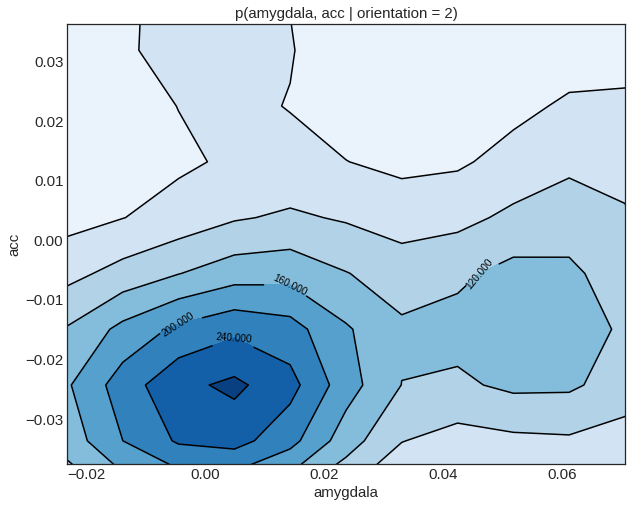

In [54]:
plot_contour(x_2,y_2,xxx_2,yyy_2,z_2,orientation=2)

#### conditional joint distribution of amygdala and acc, conditioning on political orientation 3: 

In [55]:
x_3 = df[df['orientation'] == 3]["amygdala"].values
y_3 = df[df['orientation'] == 3]['acc'].values
xxx_3,yyy_3, z_3 = KDE_2d(x_3,y_3,num_grid=10,bandwidth=h_amy)

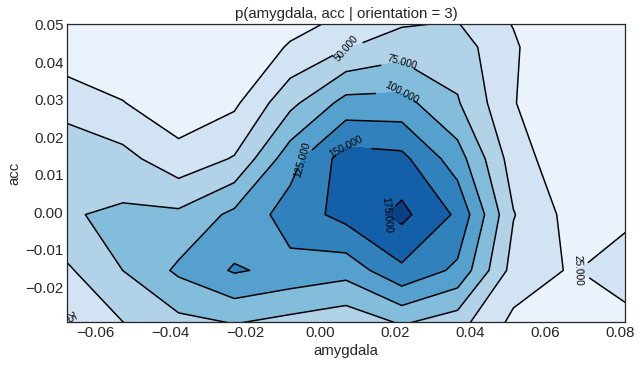

In [56]:
plot_contour(x_3,y_3,xxx_3,yyy_3,z_3,orientation=3)

#### conditional joint distribution of amygdala and acc, conditioning on political orientation 4: 

In [57]:
x_4 = df[df['orientation'] == 4]["amygdala"].values
y_4 = df[df['orientation'] == 4]['acc'].values
xxx_4,yyy_4, z_4 = KDE_2d(x_4,y_4,num_grid=10,bandwidth=h_amy)

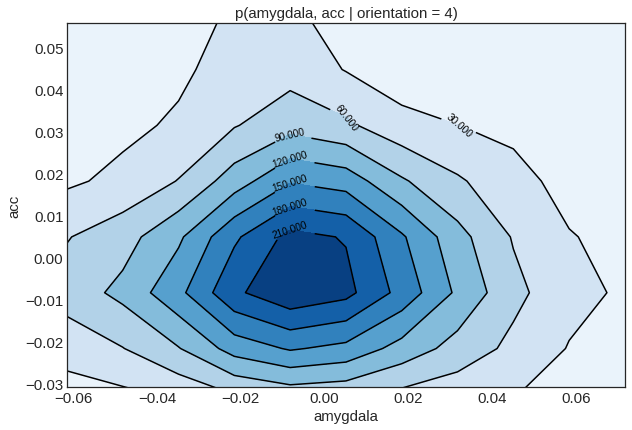

In [58]:
plot_contour(x_4,y_4,xxx_4,yyy_4,z_4,orientation=4)

#### conditional joint distribution of amygdala and acc, conditioning on political orientation 5: 

In [59]:
x_5 = df[df['orientation'] == 5]["amygdala"].values
y_5 = df[df['orientation'] == 5]['acc'].values
xxx_5,yyy_5, z_5 = KDE_2d(x_5,y_5,num_grid=10,bandwidth=h_amy)

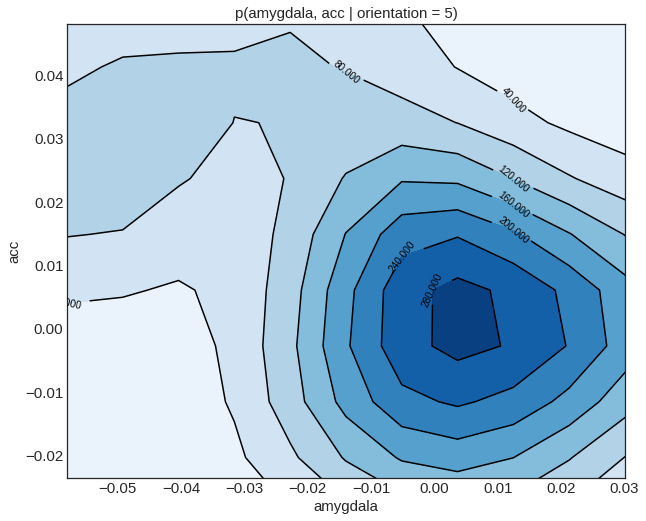

In [60]:
plot_contour(x_5,y_5,xxx_5,yyy_5,z_5,orientation=5)

#### Please explain based on the results, can you infer that the conditional distribution of two variables (amygdala, acc) are diferent from c = 2,3,4,5?
#### Based on the results, the conditional distribution of two variables (amygdala, acc) are diferent from c = 2,3,4,5